In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
import re

In [3]:
import re
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk

In [4]:
from google.colab import files
uploaded = files.upload()

Saving training.1600000.processed.noemoticon.csv.zip to training.1600000.processed.noemoticon.csv.zip


In [5]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import zipfile
import io
import pandas as pd

# Unzip the uploaded ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded['training.1600000.processed.noemoticon.csv.zip']), 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Extracts files to the '/content/' directory

# Read the extracted CSV file
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1')

# Display the first few rows of the dataframe
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [25]:
import pandas as pd
import zipfile
import io
# Unzip and load the dataset into a pandas DataFrame
with zipfile.ZipFile(io.BytesIO(uploaded['training.1600000.processed.noemoticon.csv.zip']), 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Extract the files

# Load the extracted CSV file
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Rename relevant columns
data = data[[0, 5]]  # Only keeping the sentiment and text columns
data.columns = ['sentiment', 'text']

# Convert sentiment labels: 0 = negative, 4 = positive, and map 4 to 1
data['sentiment'] = data['sentiment'].map({0: 0, 4: 1})

# Preprocess the text (you need to define the preprocess_text function)
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define the preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the preprocessing function to the 'text' column
data['text'] = data['text'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
data.head()


<ipython-input-25-ec359c4c0db7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].map({0: 0, 4: 1})
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,text
0,0,switchfoot bummer shoulda got david carr third...
1,0,upset update facebook texting might cry result...
2,0,kenichan dived many times ball managed save re...
3,0,whole body feels itchy like fire
4,0,nationwideclass behaving mad see


In [26]:
# prompt: Split into train and test data

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)


In [27]:
# Limit to a smaller subset (1% of the data) if needed for faster testing

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.01, random_state=42)

**Feature Extraction and Model Training**

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [29]:
# prompt: Convert text to Bag-of-Words representation

vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features
X_train_vec = vectorizer.fit_transform(X_train_sample)
X_test_vec = vectorizer.transform(X_test)


In [30]:
# prompt: build bow vectorizer and get features

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_sample)

# Transform the test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the first 10 feature names
print(feature_names[:10])


['_crc_' 'aa' 'aaron' 'abby' 'aber' 'able' 'absolute' 'absolutely' 'abt'
 'ac']


In [31]:
# prompt: getting the tfidf-based feature vectors

# We already have X_train_tfidf and X_test_tfidf from the previous code.
# These variables contain the TF-IDF feature vectors for the training and testing data.

# Example of how to access the TF-IDF feature vector for the first training example:
first_train_example_tfidf = X_train_tfidf[0]
print(first_train_example_tfidf)


  (0, 1199)	0.46044932255941
  (0, 1248)	0.5591191197402511
  (0, 1571)	0.5875552359358955
  (0, 3404)	0.3607645714587026


**Naive Bayes classifier**


In [32]:
# prompt: Train Naive Bayes classifier

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train_sample)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.723228125
              precision    recall  f1-score   support

           0       0.71      0.75      0.73    159494
           1       0.74      0.70      0.72    160506

    accuracy                           0.72    320000
   macro avg       0.72      0.72      0.72    320000
weighted avg       0.72      0.72      0.72    320000



**Random Forest Analysis**


In [48]:
# prompt: Train Random forest classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the classifier
rf_classifier.fit(X_train_tfidf, y_train_sample)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.715384375
              precision    recall  f1-score   support

           0       0.72      0.70      0.71    159494
           1       0.71      0.73      0.72    160506

    accuracy                           0.72    320000
   macro avg       0.72      0.72      0.72    320000
weighted avg       0.72      0.72      0.72    320000



**Logistic Regression Analysis**

In [53]:
# prompt: train ino logistic Regression classifier

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)  # You can adjust max_iter

# Train the classifier
lr_classifier.fit(X_train_tfidf, y_train_sample)

# Make predictions on the test set
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.73175
              precision    recall  f1-score   support

           0       0.74      0.72      0.73    159494
           1       0.73      0.75      0.74    160506

    accuracy                           0.73    320000
   macro avg       0.73      0.73      0.73    320000
weighted avg       0.73      0.73      0.73    320000



**Sentiment Analysis : Understanding the Subjectivity and Polarity of the Twitter Data.**

In [33]:
# The code below works to create a separate dataframe that one can filter down to with the polarity scores.
#First install the required packages using following commands-
#pip install -U textblob
#python -m textblob.download_corpora


import pandas as pd            #Pandas
from textblob import TextBlob #For Sentiment Anlysis
from itertools import islice #To iterate and slice the tuple read from the file


In [34]:
import zipfile
import io
import pandas as pd

# Unzip the uploaded ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded['training.1600000.processed.noemoticon.csv.zip']), 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Extracts files to the '/content/' directory

# Read the extracted CSV file
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1')

COLS = ['text', 'sentiment','subjectivity','polarity'] #create dataframe COLS

df = pd.DataFrame(columns=COLS)


In [36]:
# prompt: find subjectivity and polarity

import pandas as pd
# Assuming you have a DataFrame named 'data' with a 'text' column.
for index, row in islice(data.iterrows(), 1000):  # Process a smaller sample of rows
    text = row['text']
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    new_row = {'text': text, 'sentiment': row['sentiment'], 'subjectivity': subjectivity, 'polarity': polarity}
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Print a sample of the new DataFrame
print(df.head())


                                                text sentiment  subjectivity  \
0  switchfoot bummer shoulda got david carr third...         0           0.0   
1  upset update facebook texting might cry result...         0           0.0   
2  kenichan dived many times ball managed save re...         0           0.5   
3                   whole body feels itchy like fire         0           0.4   
4                   nationwideclass behaving mad see         0           1.0   

   polarity  
0     0.000  
1     0.000  
2     0.500  
3     0.200  
4    -0.625  


In [37]:
df.describe() # describe the dataframe


,subjectivity,polarity
count,2000.000000,2000.000000
mean,0.387041,-0.029301
std,0.350242,0.321388
min,0.000000,-1.000000
25%,0.000000,-0.183030
50%,0.400000,0.000000
75%,0.668750,0.100000
max,1.000000,1.000000


In [42]:
# prompt: describe dffilter

df[(df.polarity > 0) & (df.subjectivity > 0.5)].describe()


,subjectivity,polarity
count,298.000000,298.000000
mean,0.713260,0.369354
std,0.138918,0.248608
min,0.510000,0.012500
25%,0.600000,0.150000
50%,0.696296,0.350000
75%,0.800000,0.550000
max,1.000000,1.000000


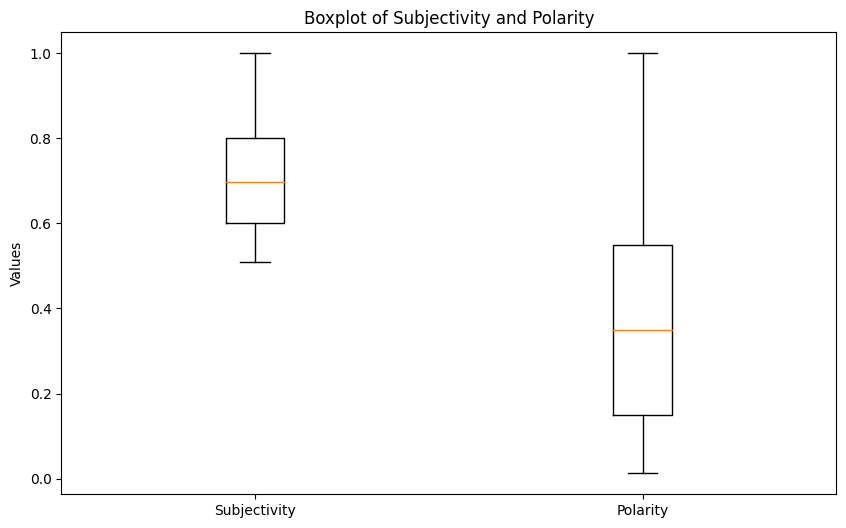

In [43]:
# prompt: boxplot for dffilter i.e. subjectivity and polarity

import matplotlib.pyplot as plt

dffilter = df[(df.polarity > 0) & (df.subjectivity > 0.5)]

# Create a boxplot for subjectivity and polarity
plt.figure(figsize=(10, 6))
plt.boxplot([dffilter['subjectivity'], dffilter['polarity']], labels=['Subjectivity', 'Polarity'])
plt.title('Boxplot of Subjectivity and Polarity')
plt.ylabel('Values')
plt.show()


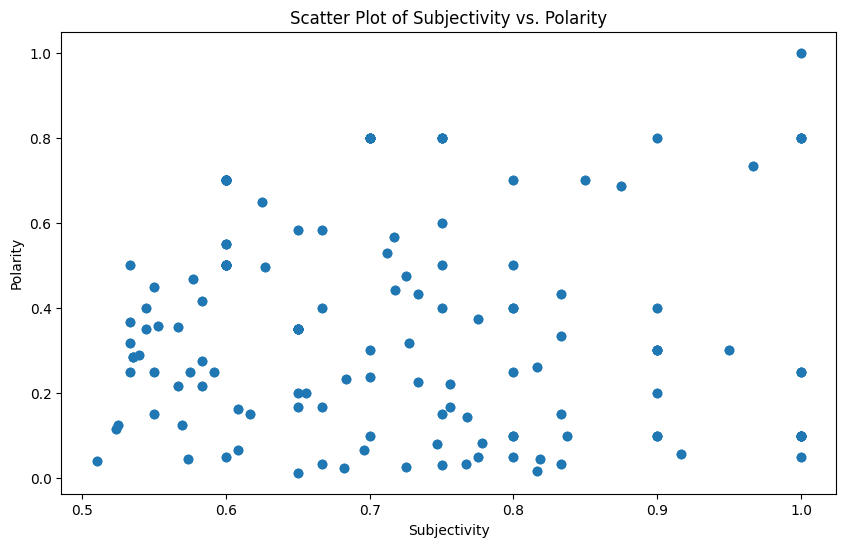

In [44]:
# prompt: scatter for dffilter

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(dffilter['subjectivity'], dffilter['polarity'])
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.title('Scatter Plot of Subjectivity vs. Polarity')
plt.show()


In [45]:
# prompt: covariance and correlation for dffilter calculate the covariance between two variables

# Calculate the covariance matrix
covariance_matrix = dffilter[['subjectivity', 'polarity']].cov()

print("Covariance Matrix:")
print(covariance_matrix)

# Calculate the correlation matrix
correlation_matrix = dffilter[['subjectivity', 'polarity']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Covariance Matrix:
              subjectivity  polarity
subjectivity      0.019298 -0.003131
polarity         -0.003131  0.061806

Correlation Matrix:
              subjectivity  polarity
subjectivity      1.000000 -0.090657
polarity         -0.090657  1.000000


**Word Text Frequency Analysis**

In [50]:
# prompt: Word Frequency of words from above

from collections import Counter

# Combine all preprocessed text into a single string
all_text = ' '.join(data['text'])

# Split the string into words
words = all_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Print the most common words and their frequencies
print("Most common words:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")


Most common words:
good: 91328
day: 89505
get: 82150
like: 78573
go: 73965
quot: 72052
today: 68208
work: 65022
love: 64692
going: 64623
got: 61438
lol: 59270
time: 57949
back: 56936
u: 55991
one: 53937
know: 52050
im: 50641
really: 50032
amp: 48706


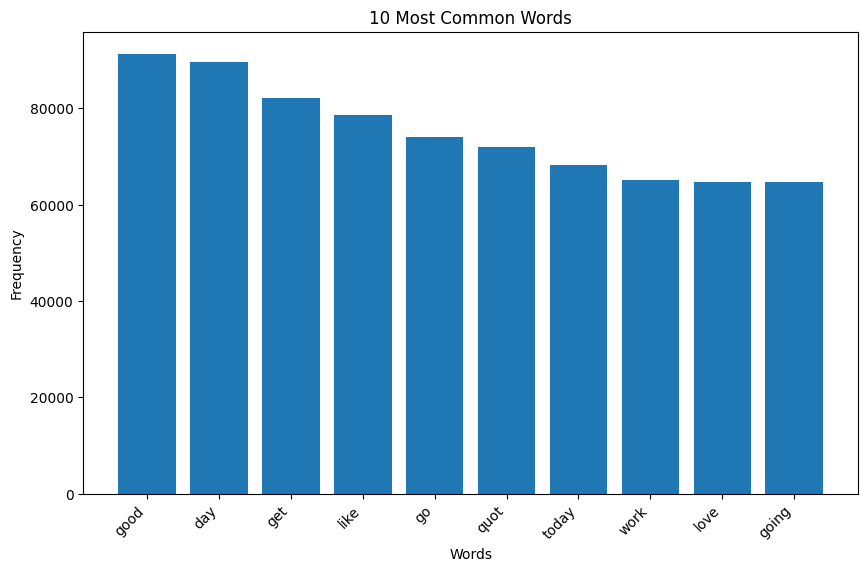

In [51]:
# prompt: BAR CHART of 10 commonly used words by customers

import matplotlib.pyplot as plt
# Get the 10 most common words
most_common_words = word_counts.most_common(10)

# Extract the words and their counts
words, counts = zip(*most_common_words)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("10 Most Common Words")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()


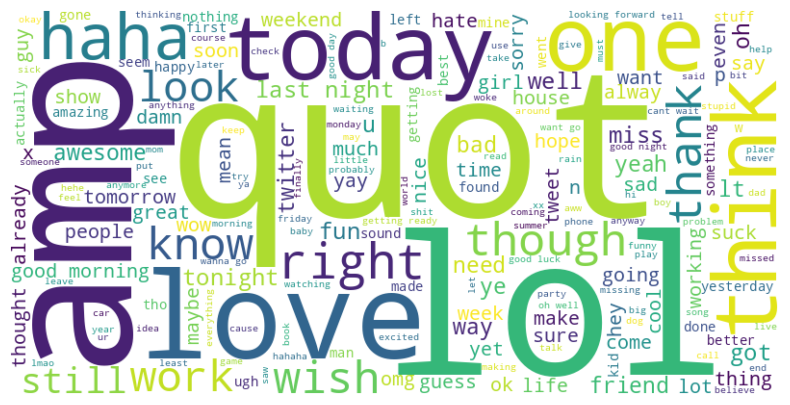

In [52]:
# prompt: draw Word Cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all preprocessed text into a single string
all_text = ' '.join(data['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
